In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
fraud=pd.read_csv("C:\\Users\\Trupti Kendre\\Downloads\\Fraud_check.csv")

In [5]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
fraud1=fraud.rename({'Marital.Status': 'MarStat','Taxable.Income': 'TaxInc','City.Population': 'CityPop','Work.Experience': 'WorkExp'},axis=1)
fraud1

,Undergrad,MarStat,TaxInc,CityPop,WorkExp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [10]:
label_encoder

LabelEncoder()

In [11]:
fraud1['Undergrad']=label_encoder.fit_transform(fraud1['Undergrad'])
fraud1['MarStat']=label_encoder.fit_transform(fraud1['MarStat'])
fraud1['Urban']=label_encoder.fit_transform(fraud1['Urban'])
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int32
 1   MarStat    600 non-null    int32
 2   TaxInc     600 non-null    int64
 3   CityPop    600 non-null    int64
 4   WorkExp    600 non-null    int64
 5   Urban      600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


# treating those who have taxable_income<=30,000 as "Risky" and others are "good"

In [12]:
fraud1['status']= fraud1['TaxInc'].apply(lambda TaxInc: 'Risky' if TaxInc<=30000 else'Good')
fraud1

,Undergrad,MarStat,TaxInc,CityPop,WorkExp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [13]:
fraud1.drop(['TaxInc'],axis=1)

,Undergrad,MarStat,CityPop,WorkExp,Urban,status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [14]:
fraud1['status']=label_encoder.fit_transform(fraud1['status'])

In [15]:
x=fraud1.iloc[:,0:5]
y=fraud1['status']

In [16]:
x

,Undergrad,MarStat,TaxInc,CityPop,WorkExp
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [19]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64

# so we find Good is 0 and Risk is 1

In [22]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=40)

# Building Decision Tree Classifier using ENTROPY critera

In [23]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

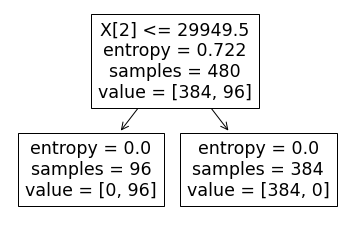

In [25]:
from sklearn import tree
tree.plot_tree(model);

In [26]:
model.get_n_leaves()

2

In [27]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    92
1    28
dtype: int64

In [28]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [29]:
predt=model.predict(x_train)
pd.Series(predt).value_counts()

0    384
1     96
dtype: int64

In [30]:
pd.crosstab(y_test,preds)

col_0,0,1
status,,
0,92,0
1,0,28


In [31]:
np.mean(preds==y_test)

1.0

In [32]:
print(classification_report(predt,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        96

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [33]:
print(classification_report(preds,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        28

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Building Decision Tree Classifier using GINI Criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini', max_depth=5)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
predt=model_gini.predict(x_train)
np.mean(predt==y_train)

1.0

In [37]:
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Eaxmple

In [38]:
array=fraud1.values
x=fraud1.iloc[:,0:5]
y=fraud1['status']

In [39]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=40)

In [41]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
model.score(x_test,y_test)

1.0

# Company dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

In [45]:
company=pd.read_csv("C:\\Users\\Trupti Kendre\\Downloads\\Company_Data.csv")

In [46]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [47]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [48]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [49]:
company[company.duplicated()].shape

(0, 11)

In [50]:
label_encoder = preprocessing.LabelEncoder()

In [51]:
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [52]:
company['value']= company['Sales'].apply(lambda Sales: 'High' if Sales <=7.49 else 'Low')

In [53]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,value
0,9.50,138,73,11,276,120,0,42,17,1,1,Low
1,11.22,111,48,16,260,83,1,65,10,1,1,Low
2,10.06,113,35,10,269,80,2,59,12,1,1,Low
3,7.40,117,100,4,466,97,2,55,14,1,1,High
4,4.15,141,64,3,340,128,0,38,13,1,0,High


In [55]:
company.drop(['Sales','Urban'], axis=1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,value
0,138,73,11,276,120,0,42,17,1,Low
1,111,48,16,260,83,1,65,10,1,Low
2,113,35,10,269,80,2,59,12,1,Low
3,117,100,4,466,97,2,55,14,1,High
4,141,64,3,340,128,0,38,13,0,High
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,Low
396,139,23,3,37,120,2,55,11,1,High
397,162,26,12,368,159,2,40,18,1,High
398,100,79,7,284,95,0,50,12,1,High


In [56]:
company['value'] = label_encoder.fit_transform(company['value'])

In [61]:
x=company.iloc[:,0:10]
y=company.iloc[:,11]

In [62]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,0,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1
396,6.14,139,23,3,37,120,2,55,11,0
397,7.41,162,26,12,368,159,2,40,18,1
398,5.94,100,79,7,284,95,0,50,12,1


In [63]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: value, Length: 400, dtype: int32

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)

# Building Decision Tree Classifier using ENTROPY Criteria

In [65]:
model= DecisionTreeClassifier(criterion='entropy', max_depth=11)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [66]:
model.get_n_leaves()

2

In [67]:
preds= model.predict(x_test)
print('Test data Accuracy is:',np.mean(preds==y_test))

Test data Accuracy is: 1.0


In [68]:
predt= model.predict(x_train)
print('Train data Accuracy is:',np.mean(predt==y_train))

Train data Accuracy is: 1.0


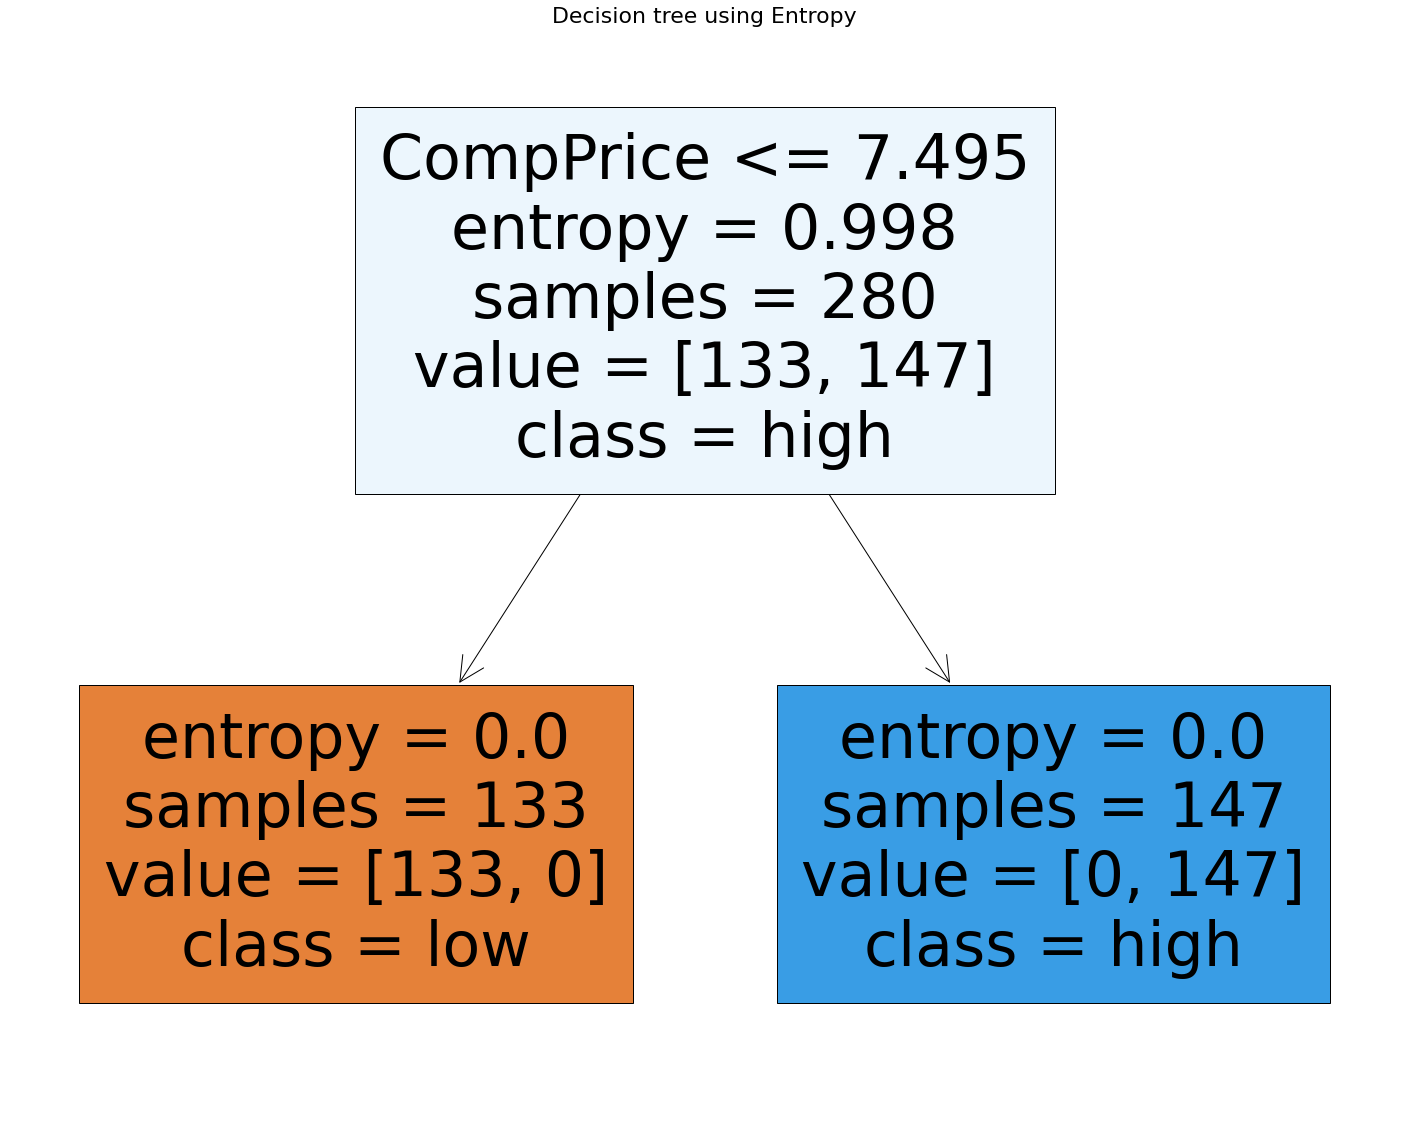

In [69]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

In [70]:
pd.crosstab(y_test,preds)

col_0,0,1
value,,
0,68,0
1,0,52


In [71]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        52

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# By GINI criteria

In [72]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=11)

In [73]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [74]:
preds=model_gini.predict(x_test)
print('Train data Accuracy:',np.mean(predt==y_train))

Train data Accuracy: 1.0


In [75]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        52

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Decision Tree Regression Example

In [77]:
from sklearn.tree import DecisionTreeRegressor
array= company.values
x = company.iloc[:,0:10]
y = company.iloc[:,11]

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=40)

In [79]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [80]:
model.score(x_test,y_test)

1.0

In [81]:
pd.crosstab(y_test,preds)

col_0,0,1
value,,
0,68,0
1,0,52


In [82]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        52

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

